In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# Import Data Used
bias1 = fits.open('Bias_Images/b1.fits')
bias2 = fits.open('Bias_Images/b2.fits')
bias3 = fits.open('Bias_Images/b3.fits')
bias4 = fits.open('Bias_Images/b4.fits')
bias5 = fits.open('Bias_Images/b5.fits')
bias6 = fits.open('Bias_Images/b6.fits')
bias7 = fits.open('Bias_Images/b7.fits')
bias8 = fits.open('Bias_Images/b8.fits')
bias9 = fits.open('Bias_Images/b9.fits')
bias10 = fits.open('Bias_Images/b10.fits')
bias11 = fits.open('Bias_Images/b11.fits')
bias12 = fits.open('Bias_Images/b12.fits')
bias13 = fits.open('Bias_Images/b13.fits')
bias14 = fits.open('Bias_Images/b14.fits')
bias15 = fits.open('Bias_Images/b15.fits')
bias16 = fits.open('Bias_Images/b16.fits')
bias17 = fits.open('Bias_Images/b17.fits')
bias18 = fits.open('Bias_Images/b18.fits')
bias19 = fits.open('Bias_Images/b19.fits')
bias20 = fits.open('Bias_Images/b20.fits')
bias21 = fits.open('Bias_Images/b21.fits')
bias22 = fits.open('Bias_Images/b22.fits')
bias23 = fits.open('Bias_Images/b23.fits')
bias24 = fits.open('Bias_Images/b24.fits')
bias25 = fits.open('Bias_Images/b25.fits')
bias26 = fits.open('Bias_Images/b26.fits')
bias27 = fits.open('Bias_Images/b27.fits')
bias28 = fits.open('Bias_Images/b28.fits')
bias29 = fits.open('Bias_Images/b29.fits')
bias30 = fits.open('Bias_Images/b30.fits')
sky1 = fits.open('Sky_Images/sky1.fits')
sky2 = fits.open('Sky_Images/sky2.fits')
sky3 = fits.open('Sky_Images/sky3.fits')
sky4 = fits.open('Sky_Images/sky4.fits')
sky5 = fits.open('Sky_Images/sky5.fits')
obj1 = fits.open('Object_Images/obj1.fits')
obj2 = fits.open('Object_Images/obj2.fits')
obj3 = fits.open('Object_Images/obj3.fits')
obj4 = fits.open('Object_Images/obj4.fits')

In [3]:
# Change FITS files to an image array of grayscale values
bias1d = bias1[0].data
bias2d = bias2[0].data
bias3d = bias3[0].data
bias4d = bias4[0].data
bias5d = bias5[0].data
bias6d = bias6[0].data
bias7d = bias7[0].data
bias8d = bias8[0].data
bias9d = bias9[0].data
bias10d = bias10[0].data
bias11d = bias11[0].data
bias12d = bias12[0].data
bias13d = bias13[0].data
bias14d = bias14[0].data
bias15d = bias15[0].data
bias16d = bias16[0].data
bias17d = bias17[0].data
bias18d = bias18[0].data
bias19d = bias19[0].data
bias20d = bias20[0].data
bias21d = bias21[0].data
bias22d = bias22[0].data
bias23d = bias23[0].data
bias24d = bias24[0].data
bias25d = bias25[0].data
bias26d = bias26[0].data
bias27d = bias27[0].data
bias28d = bias28[0].data
bias29d = bias29[0].data
bias30d = bias30[0].data
sky1d = sky1[0].data
sky2d = sky2[0].data
sky3d = sky3[0].data
sky4d = sky4[0].data
sky5d = sky5[0].data
obj1d = obj1[0].data
obj2d = obj2[0].data
obj3d = obj3[0].data
obj4d = obj4[0].data

In [4]:
# Organize lists of images
skylist = [sky1d,sky2d,sky3d,sky4d,sky5d]
biaslist = [bias1d,bias2d,bias3d,bias4d,bias5d,bias6d,bias7d,bias8d,bias9d,bias10d,bias11d,bias12d,bias13d,bias14d,bias15d,bias16d,bias17d,bias18d,bias19d,bias20d,bias21d,bias22d,bias23d,bias24d,bias25d,bias26d,bias27d,bias28d,bias29d,bias30d]
objlist = [obj1d,obj2d,obj3d,obj4d]

In [5]:
# Define functions that I may or may not use

# Takes multiple arrays with the same dimensions and takes the median pixel value for each
# pixel. Used to combine images and get rid of extreme pixel values.
def median_of_arrays(piclist):
    width = len(piclist[0][0])
    height = len(piclist[0])
    length = len(piclist)
    array = np.array([[0]*width]*height)
    for row in range(height):
        for col in range(width):
            pixellist = [0]*length
            for image in range(length):
                pixellist[image] = piclist[image][row][col]
            median_value = np.median(pixellist)
            array[row][col] = median_value
    return array

# Same as previous function but uses mean. May be more useful if there are no extreme values.
def mean_of_arrays(piclist):
    array = np.array([[0]*len(piclist[0][0])]*len(piclist[0]))
    for row in range(len(piclist[0])):
        for col in range(len(piclist[0][0])):
            pixellist = [0]*len(piclist)
            for stuff in range(len(piclist)):
                pixellist[stuff] = piclist[stuff][row][col]
            mean_value = np.mean(pixellist)
            array[row][col] = mean_value
    return array

# Creates boolean array to show wether pixels are above or below a certain value.
def def_overscan(pic, value):
    overscan = np.array([[False]*len(pic[0])]*len(pic))
    for row in range(len(pic)):
        for col in range(len(pic[0])):
            if pic[row][col] > value:
                overscan[row][col] = True
    return overscan

# Gives a visual representation of boolean array.
def print_overscan(overscan):
    overscanint = np.array([[0]*len(overscan[0])]*len(overscan))
    for row in range(len(overscan)):
        for col in range(len(overscan[0])):
            if overscan[row][col] == True:
                overscanint[row][col] = 1
    return overscanint

# Removes overscan regions from an image. This is done by taking the middle row and
# middle column of a 2d boolean array (Which is defined using the def_overscan() function)
# and working from the top, bottom, right, and left of the row and the column.
# To define the cutoff it finds the first point where two
# pixels are above the cutoff value and counts the pixel right before that.
def cut_overscan(pic, value=None, overscan=None):
    if type(overscan) == np.ndarray:
        mask = overscan
    else:
        mask = def_overscan(pic,value)
    height = len(pic)
    width = len(pic[0])
    midhoriz = int(height/2)
    midvert = int(width/2)
    left=0
    right=0
    top=0
    bottom=0
    for col in range(width-1,-1,-1):
        if (mask[midhoriz][col] == True) and (mask[midhoriz][col+1] == True):
            left = col
    for col in range(width):
        if (mask[midhoriz][col] == True) and (mask[midhoriz][col-1] == True):
            right = col
    for row in range(height-1,-1,-1):
        if (mask[row][midvert] == True) and (mask[row+1][midvert] == True):
            top = row
    for row in range(height):
        if (mask[row][midvert] == True) and (mask[row-1][midvert] == True):
            bottom = row
    image = np.array([[0]*(right-left)]*(bottom-top))
    
    for row in range(len(image)):
        for col in range(len(image[0])):
            image[row][col] = pic[row+top][col+left]
        
    return image

# Easy way of showing an image with the settings I want
def present(image, low=0, high=None):
    plt.imshow(image, cmap='gray')
    if high != None:
        plt.clim(low,high)
    plt.colorbar()
    print(len(image[0]),'x',len(image))

# Easy way of presenting an RGB image
def present_rgb(image):
    print(len(image[0]),'x',len(image))
    plt.imshow(image)
    plt.show()

# Takes a list of images and cuts all of their overscans
def cut_overscan_list(imglist, value=None, overscan=None):
    imglist_no_overscan = imglist
    for image in range(len(imglist)):
        imglist_no_overscan[image] = cut_overscan(objlist[image],value,overscan)
    return imglist_no_overscan

# Easier way to crop an image 
def trim(image, right, left, top, bottom):
    trimmed = np.array([[0]*(len(image[0]) - left - right)]*(len(image) - top - bottom))
    for row in range(len(trimmed)):
        for col in range(len(trimmed[0])):
            trimmed[row][col] = image[row+top][col+left]
    return trimmed

# Align a list of images. Can only be done by inputting how much each image is shifted.
def align(imglist, deltaXlist, deltaYlist):
    
    if deltaXlist[0] > 0:
        left = [0] * (len(deltaXlist)+1)
        for i in range(1, len(deltaXlist)+1):
            left[i] = abs(sum(deltaXlist[0:i]))
        right = left[::-1]
    else:
        right = [0] * (len(deltaXlist)+1)
        for i in range(1, len(deltaXlist)+1):
            right[i] = abs(sum(deltaXlist[0:i]))
        left = right[::-1]
    
    if deltaYlist[0] > 0:
        top = [0] * (len(deltaYlist)+1)
        for i in range(1, len(deltaYlist)+1):
            top[i] = abs(sum(deltaYlist[0:i]))
        bottom = top[::-1]
    else:
        bottom = [0] * (len(deltaYlist)+1)
        for i in range(1, len(deltaYlist)+1):
            bottom[i] = abs(sum(deltaYlist[0:i]))
        top = bottom[::-1]
        
    aligned_images = [0] * len(imglist)
    for i in range(len(imglist)):
        print('image', i)
        aligned_images[i] = trim(imglist[i], right[i], left[i], top[i], bottom[i])
    return aligned_images

# Create a new file, input the data and the name of the new file.
def create(data, outfile):
    if type(outfile) != str:
        print('outfile must be a string')
        return None
    if outfile[-5:] != '.fits':
        print("must end in '.fits'")
        return None
    fitsfile = fits.open('dummy.fits')
    fitsfile[0].data = data
    fitsfile.writeto(outfile, overwrite=True, output_verify='ignore')
    
# Finds the median value for all of the pixels in multiple images.
def bias_median(biaslist):
    medianlist = []
    for bias in range(len(biaslist)):
        med = np.median(biaslist[bias])
        medianlist.insert(0, med)
    return np.median(medianlist)

In [6]:
# Create initial bias
print('creating bias')
bias_value = bias_median(biaslist)
print('bias value:', bias_value)

creating bias
bias value: 194.5


In [7]:
# Create sky flat
print('creating sky flat')
sky = mean_of_arrays(skylist)
sky_no_overscan = cut_overscan(sky, value=700)
sky_final = sky_no_overscan - bias_value

creating sky flat


establishing objects
cutting overscan
subtracting bias
dividing out sky
aligning:
image 0
image 1
image 2
image 3
combining
1595 x 901


would you like to save n


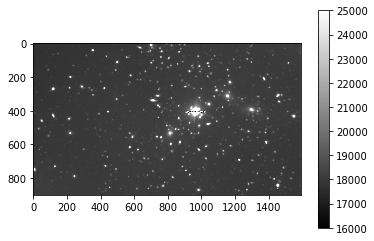

In [8]:
# Create object image
print('establishing objects')
objlist = [obj1d,obj2d,obj3d,obj4d]

print('cutting overscan')
objlist_no_overscan = cut_overscan_list(objlist, overscan=def_overscan(sky,700))

print('subtracting bias')
objlist_no_bias = objlist_no_overscan - bias_value

print('dividing out sky')
objlist_calibrated = (objlist_no_bias / sky_final) *100000

print('aligning:')
deltaX = [28,27,28]
deltaY = [-19,-20,-19]
objlist_aligned = align(objlist_calibrated, deltaX, deltaY)

print('combining')
object_final = median_of_arrays(objlist_aligned)
present(object_final,16000,25000)
save = str(input('would you like to save'))
if save == 'y':
    filename = str(input('File name (object_final.fits recommended):'))
    create(object_final, filename)

In [9]:
# Taking the Sersic index

# An extreme way to manually get rid of bias and extreme values.
def absolute_bias_destroyer3000(image, lower, upper=None):
    the_bias_has_been_slain = np.array([[0]*len(image[0])]*len(image))
    for row in range(len(image)):
        for col in range(len(image[0])):
            if image[row][col] < lower:
                the_bias_has_been_slain[row][col] = 0
            elif type(upper) == int and image[row][col] > upper:
                the_bias_has_been_slain[row][col] = 0
            else:
                the_bias_has_been_slain[row][col] = image[row][col]
    return the_bias_has_been_slain

# Does the same thing as previous function but also subtracts bias from normal pixels.
def subtract_bias(image, bias_value, limit = None):
    bias = np.array([[0]*len(image[0])]*len(image))
    for row in range(len(image)):
        for col in range(len(image[0])):
            if type(limit) == int and image[row][col] > limit:
                bias[row][col] = 0
            elif image[row][col] > bias_value:
                bias[row][col] = image[row][col] - bias_value
            else:
                bias[row][col] = 0
    return bias

# Calculates the distance between two pixels.
def distance(pixelA, pixelB):
    dy = pixelB[1] - pixelA[1]
    dx = pixelB[0] - pixelA[0]
    return (dy**2 + dx**2)**(1/2)

# Defines what pixel is the center of a galaxy image based on brightness.
def center(image):
    bright = 0
    for row in range(len(image)):
        for col in range(len(image[0])):
            if image[row][col] > bright:
                pixel = [col, row]
                bright = image[row][col]
    return pixel

# Trims the ultimate image to be a singular galaxy and then makes the corner.
# pixels equal to zero.
def trim_circle(image, radius, corner1, corner2):
    
    if corner1[1] < corner2[1]:
        top = corner1[1]
        bottom = len(image) - corner2[1]
    else:
        top = corner2[1]
        bottom = len(image) - corner1[1]
    
    if corner1[0] > corner2[0]:
        right = len(image[0]) - corner1[0]
        left = corner2[0]
    else:
        right = len(image[0]) - corner2[0]
        left = corner1[0]
    
    trimmed = trim(image, right, left, top, bottom)
    
    pixelA = center(trimmed)
    for row in range(len(trimmed)):
        for col in range(len(trimmed[0])):
            pixelB = [col,row]
            if distance(pixelA, pixelB) > radius:
                trimmed[row, col] = 0
    return trimmed

# Ranks each individual pixel based on brightness puts them in order in an array.
def rank_pixels(galaxy):
    brightest = center(galaxy)
    ranking = [0] * (len(galaxy)*len(galaxy[0]))
    for row in range(len(galaxy)):
        for col in range(len(galaxy[0])):
            greater = 0
            for r in range(len(galaxy)):
                for c in range(len(galaxy[0])):
                    if galaxy[r][c] > galaxy[row][col]:
                        greater += 1
            while type(ranking[greater]) != int:
                greater += 1
            ranking[greater] = [col, row, distance(brightest, [col, row])]
    return ranking

# Calculates the overall brightness of an image by adding all of the pixel values.
def brightness(pic):
    total = 0
    for row in range(len(pic)):
        for col in range(len(pic[0])):
            total += pic[row][col]
    return total

# Find the brightest pixel that falls below 1/e of the center pixel.
def e_distance(galaxy, rank):
    brightest = center(galaxy)
    brightest_value = galaxy[brightest[1]][brightest[0]]
    e_drop = brightest_value - (brightest_value/np.e)
    for pixel in range(len(rank)):
        if galaxy[rank[pixel][1]][rank[pixel][0]] < e_drop:
            return distance(brightest, rank[pixel][0:2])

# Calculate the Sersic index of the image. This is done by calculating the index for
# each pixel with a value above zero and then taking the median value.    
def take_sersic(galaxy):
    brightest = center(galaxy)
    Io = galaxy[brightest[1]][brightest[0]]
    rank = rank_pixels(galaxy)
    alpha = e_distance(galaxy, rank)
    if alpha == 1:
        alpha = 0.99
    individual_sersic = []
    for row in range(len(galaxy)):
        for col in range(len(galaxy[0])):
            if galaxy[row][col] > 1:
                I = galaxy[row][col]
                if I != Io:
                    r = distance(brightest, [col, row])
                    n = (math.log(r,10)-math.log(alpha,10)) / (math.log(math.log(Io)-math.log(I),10))
                    individual_sersic.insert(0,n)
    return np.median(individual_sersic)

# Just an easy way to test the previous function.
def take_sersic_test(galaxy):
    brightest = center(galaxy)
    Io = galaxy[brightest[1]][brightest[0]]
    print(Io)
    rank = rank_pixels(galaxy)
    alpha = e_distance(galaxy, rank)
    if alpha == 1:
        alpha = 0.99
    print(alpha)
    individual_sersic = []
    for row in range(len(galaxy)):
        for col in range(len(galaxy[0])):
            if galaxy[row][col] > 1:
                I = galaxy[row][col]
                #print(I)
                if I != Io:
                    r = distance(brightest, [col, row])
                    print(I, Io, r, alpha)
                    #print(-math.log(math.log(I,Io),r*alpha))
                    n = 1 / (math.log(math.log(1/I,Io),r/alpha))
                    individual_sersic.insert(0,n)
    return np.median(individual_sersic)
        
# Finds the center pixel of an imputed rectangle and makes it and the surrounding pixels
# into a 18x18 red square.
def make_red(rgb_image, corner1, corner2):
    pixel = [int(np.mean([corner1[0], corner2[0]])), int(np.mean([corner1[1], corner2[1]]))]
    for a in range(-9,10):
        for b in range(-9,10):
            rgb_image[a+pixel[1]][b+pixel[0]] = [255,0,0]
    return rgb_image

# Does the same thing as the previous function but with yellow.
def make_yellow(rgb_image, corner1, corner2):
    pixel = [int(np.mean([corner1[0], corner2[0]])), int(np.mean([corner1[1], corner2[1]]))]
    for a in range(-9,10):
        for b in range(-9,10):
            rgb_image[a+pixel[1]][b+pixel[0]] = [255,255,0]
    return rgb_image
    
# Takes a greyscale image and makes it into a rgb image.
# (Still appears grey but now color can be added)
def make_rgb(image):
    rgb_image = np.array([[[0,0,0]]*len(image[0])]*len(image))
    for row in range(len(image)):
        for col in range(len(image[0])):
            value = image[row][col]
            rgb_image[row][col] = [value, value, value]
    return rgb_image

# Covers a given area of an image with pixels of zero value. This was used to make
# sure galaxies were not counted twice.
def cover(image, corner1, corner2):
    if corner1[0] > corner2[0]:
        xmin = corner2[0]
    else:
        xmin = corner1[0]
    
    if corner1[1] > corner2[1]:
        ymin = corner2[1]
    else:
        ymin = corner1[1]
        
    deltx = abs(corner1[0]-corner2[0])
    delty = abs(corner1[1]-corner2[1])
        
    for row in range(delty):
        for col in range(deltx):
            image[row+ymin][col+xmin] = 0
    return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1595 x 901


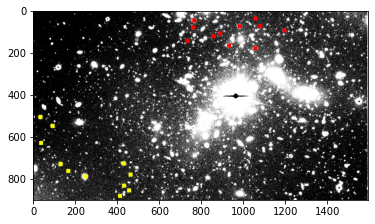

inner sample: [1.402778032411517, 0.8937894223181245, 1.2474612536545884, 1.2171720144616813, 1.165419849523639, 1.1369356271326585, 0.8434370545435541, 1.2461922624498927, 1.0443209037626318, 1.1904738748328083, 0.9762477842190829]

inner radius: [6, 7.5, 12, 16, 7.5, 5.5, 7, 8, 13, 9, 13.6]
average inner radius 9.554545454545455

inner mean: 1.1240207344827435
inner median: 1.165419849523639
****************************************************************************
outer sample: [1.1711664858793063, 1.1405389915014807, 1.1654944276713757, 0.621342396838345, 0.6947834376905906, 0.9711703459198392, 1.160102788394993, 1.121978675905285, 1.1554520491937705, 1.1805512084873457, 1.4487102167962467]

outer radius: [5.5, 6.5, 7, 8, 7.5, 13.5, 9.5, 11.5, 11.5, 11, 18]
average outer radius 9.954545454545455

outer mean: 1.0755719112980526
outer median 1.1554520491937705


In [10]:
bias_eliminated = subtract_bias(object_final, 18100, 70000)
#create(bias_eliminated, 'no_bias_final.fits')
rgb = make_rgb(bias_eliminated)

# Take Data for sample of galaxies inside the cluster

inner_sample = []
inner_radius = []

corner1 = [780,62]
corner2 = [754,36]
radius = 13.6
galaxy = trim_circle(bias_eliminated, radius, corner1, corner2)
sersic = take_sersic(galaxy)
inner_sample.insert(0, sersic)
inner_radius.insert(0, radius)
rgb = make_red(rgb, corner1, corner2)
bias_eliminated = cover(bias_eliminated, corner1, corner2)

corner1 = [771,92]
corner2 = [752,72]
radius = 9
galaxy = trim_circle(bias_eliminated, radius, corner1, corner2)
sersic = take_sersic(galaxy)
inner_sample.insert(0, sersic)
inner_radius.insert(0, radius)
rgb = make_red(rgb, corner1, corner2)
bias_eliminated = cover(bias_eliminated, corner1, corner2)

corner1 = [998,90]
corner2 = [970,65]
radius = 13
galaxy = trim_circle(bias_eliminated, radius, corner1, corner2)
sersic = take_sersic(galaxy)
inner_sample.insert(0, sersic)
inner_radius.insert(0, radius)
rgb = make_red(rgb, corner1, corner2)
bias_eliminated = cover(bias_eliminated, corner1, corner2)

corner1 = [1091,86]
corner2 = [1072,66]
radius = 8
galaxy = trim_circle(bias_eliminated, radius, corner1, corner2)
sersic = take_sersic(galaxy)
inner_sample.insert(0, sersic)
inner_radius.insert(0, radius)
rgb = make_red(rgb, corner1, corner2)
bias_eliminated = cover(bias_eliminated, corner1, corner2)

corner1 = [884,102]
corner2 = [899,118]
radius = 7
galaxy = trim_circle(bias_eliminated, radius, corner1, corner2)
sersic = take_sersic(galaxy)
inner_sample.insert(0, sersic)
inner_radius.insert(0, radius)
rgb = make_red(rgb, corner1, corner2)
bias_eliminated = cover(bias_eliminated, corner1, corner2)

corner1 = [854,117]
corner2 = [868,131]
radius = 5.5
galaxy = trim_circle(bias_eliminated, radius, corner1, corner2)
sersic = take_sersic(galaxy)
inner_sample.insert(0, sersic)
inner_radius.insert(0, radius)
rgb = make_red(rgb, corner1, corner2)
bias_eliminated = cover(bias_eliminated, corner1, corner2)

corner1 = [745,154]
corner2 = [728,138]
radius = 7.5
galaxy = trim_circle(bias_eliminated, radius, corner1, corner2)
sersic = take_sersic(galaxy)
inner_sample.insert(0, sersic)
inner_radius.insert(0, radius)
rgb = make_red(rgb, corner1, corner2)
bias_eliminated = cover(bias_eliminated, corner1, corner2)

corner1 = [950,156]
corner2 = [916,180]
radius = 16
galaxy = trim_circle(bias_eliminated, radius, corner1, corner2)
sersic = take_sersic(galaxy)
inner_sample.insert(0, sersic)
inner_radius.insert(0, radius)
rgb = make_red(rgb, corner1, corner2)
bias_eliminated = cover(bias_eliminated, corner1, corner2)

corner1 = [1045,170]
corner2 = [1072,192]
radius = 12
galaxy = trim_circle(bias_eliminated, radius, corner1, corner2)
sersic = take_sersic(galaxy)
inner_sample.insert(0, sersic)
inner_radius.insert(0, radius)
rgb = make_red(rgb, corner1, corner2)
bias_eliminated = cover(bias_eliminated, corner1, corner2)

corner1 = [1187,87]
corner2 = [1207,108]
radius = 7.5
galaxy = trim_circle(bias_eliminated, radius, corner1, corner2)
sersic = take_sersic(galaxy)
inner_sample.insert(0, sersic)
inner_radius.insert(0, radius)
rgb = make_red(rgb, corner1, corner2)
bias_eliminated = cover(bias_eliminated, corner1, corner2)

corner1 = [1052,34]
corner2 = [1065,46]
radius = 6
galaxy = trim_circle(bias_eliminated, radius, corner1, corner2)
sersic = take_sersic(galaxy)
inner_sample.insert(0, sersic)
inner_radius.insert(0, radius)
rgb = make_red(rgb, corner1, corner2)
bias_eliminated = cover(bias_eliminated, corner1, corner2)

# Data for sample of galaxies on the outer edges of the cluster

outer_sample = []
outer_radius = []

corner1 = [265,805]
corner2 = [229,773]
radius = 18
galaxy = trim_circle(bias_eliminated, radius, corner1, corner2)
sersic = take_sersic(galaxy)
outer_sample.insert(0, sersic)
outer_radius.insert(0, radius)
rgb = make_yellow(rgb, corner1, corner2)
bias_eliminated = cover(bias_eliminated, corner1, corner2)

corner1 = [120,720]
corner2 = [142,741]
radius = 11
galaxy = trim_circle(bias_eliminated, radius, corner1, corner2)
sersic = take_sersic(galaxy)
outer_sample.insert(0, sersic)
outer_radius.insert(0, radius)
rgb = make_yellow(rgb, corner1, corner2)
bias_eliminated = cover(bias_eliminated, corner1, corner2)

corner1 = [105,560]
corner2 = [82,538]
radius = 11.5
galaxy = trim_circle(bias_eliminated, radius, corner1, corner2)
sersic = take_sersic(galaxy)
outer_sample.insert(0, sersic)
outer_radius.insert(0, radius)
rgb = make_yellow(rgb, corner1, corner2)
bias_eliminated = cover(bias_eliminated, corner1, corner2)

corner1 = [24,497]
corner2 = [47,518]
radius = 11.5
galaxy = trim_circle(bias_eliminated, radius, corner1, corner2)
sersic = take_sersic(galaxy)
outer_sample.insert(0, sersic)
outer_radius.insert(0, radius)
rgb = make_yellow(rgb, corner1, corner2)
bias_eliminated = cover(bias_eliminated, corner1, corner2)

corner1 = [473,790]
corner2 = [456,771]
radius = 9.5
galaxy = trim_circle(bias_eliminated, radius, corner1, corner2)
sersic = take_sersic(galaxy)
outer_sample.insert(0, sersic)
outer_radius.insert(0, radius)
rgb = make_yellow(rgb, corner1, corner2)
bias_eliminated = cover(bias_eliminated, corner1, corner2)

corner1 = [445,737]
corner2 = [418,717]
radius = 13.5
galaxy = trim_circle(bias_eliminated, radius, corner1, corner2)
sersic = take_sersic(galaxy)
outer_sample.insert(0, sersic)
outer_radius.insert(0, radius)
rgb = make_yellow(rgb, corner1, corner2)
bias_eliminated = cover(bias_eliminated, corner1, corner2)

corner1 = [465,863]
corner2 = [450,848]
radius = 7.5
galaxy = trim_circle(bias_eliminated, radius, corner1, corner2)
sersic = take_sersic(galaxy)
outer_sample.insert(0, sersic)
outer_radius.insert(0, radius)
rgb = make_yellow(rgb, corner1, corner2)
bias_eliminated = cover(bias_eliminated, corner1, corner2)

corner1 = [439,840]
corner2 = [427,824]
radius = 8
galaxy = trim_circle(bias_eliminated, radius, corner1, corner2)
sersic = take_sersic(galaxy)
outer_sample.insert(0, sersic)
outer_radius.insert(0, radius)
rgb = make_yellow(rgb, corner1, corner2)
bias_eliminated = cover(bias_eliminated, corner1, corner2)

corner1 = [407,874]
corner2 = [422,889]
radius = 7
galaxy = trim_circle(bias_eliminated, radius, corner1, corner2)
sersic = take_sersic(galaxy)
outer_sample.insert(0, sersic)
outer_radius.insert(0, radius)
rgb = make_yellow(rgb, corner1, corner2)
bias_eliminated = cover(bias_eliminated, corner1, corner2)

corner1 = [44,637]
corner2 = [33,624]
radius = 6.5
galaxy = trim_circle(bias_eliminated, radius, corner1, corner2)
sersic = take_sersic(galaxy)
outer_sample.insert(0, sersic)
outer_radius.insert(0, radius)
rgb = make_yellow(rgb, corner1, corner2)
bias_eliminated = cover(bias_eliminated, corner1, corner2)

corner1 = [174,758]
corner2 = [163,769]
radius = 5.5 
galaxy = trim_circle(bias_eliminated, radius, corner1, corner2)
sersic = take_sersic(galaxy)
outer_sample.insert(0, sersic)
outer_radius.insert(0, radius)
rgb = make_yellow(rgb, corner1, corner2)
bias_eliminated = cover(bias_eliminated, corner1, corner2)

present_rgb(rgb)
print('inner sample:', inner_sample)
print('')
print('inner radius:',inner_radius)
print('average inner radius', np.mean(inner_radius))
print('')
print('inner mean:', np.mean(inner_sample))
print('inner median:', np.median(inner_sample))
print('****************************************************************************')
print('outer sample:', outer_sample)
print('')
print('outer radius:', outer_radius)
print('average outer radius', np.mean(outer_radius))
print('')
print('outer mean:', np.mean(outer_sample))
print('outer median', np.median(outer_sample))

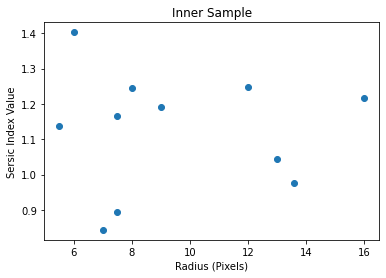

In [11]:
# Comparing the size of the galaxy to it's sersic index for inner sample
x = inner_radius
y = inner_sample
plt.title('Inner Sample')
plt.xlabel('Radius (Pixels)')
plt.ylabel('Sersic Index Value')
plt.plot(x,y,ls='none',marker='o')

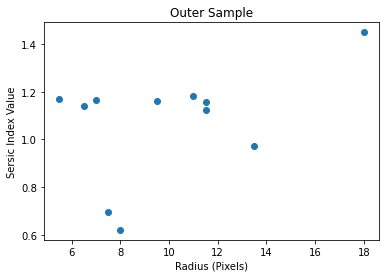

In [12]:
# Comparing the size of the galaxy to it's sersic index for outer sample
x = outer_radius
y = outer_sample
plt.title('Outer Sample')
plt.xlabel('Radius (Pixels)')
plt.ylabel('Sersic Index Value')
plt.plot(x,y,ls='none',marker='o')